Stuart Rossiter, C00284845

# Licensing
Decision Tree on the January 2017 dataset of Lichess Games Copyright (C) 2025 Stuart Rossiter

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.

# Decision Tree - Game Terminations

Knowing how games have gone and being able to predict how they will end is very useful. We can achieve this through the use of decision trees. As always, first we must clean the data, and split it into training and testing data. There are over 10 million games in the acquired dataset. Of these games, a sample of ~300,000 games has been taken. In this case, only the white_elo, black_elo, and winner will be needed.

In [1]:
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

data = pandas.read_csv("Lichess_Games_Sample.csv")

black_elo = data["black_elo"].values
white_elo = data["white_elo"].values
termination_strings = data["termination"].values
termination_types = list(set(x for x in termination_strings))
termination = [termination_types.index(x) for x in termination_strings]
event_types = list(set(str.join(" ", str.split(x, " ")[0:3]) for x in data["event"].values))
events = [event_types.index(str.join(" ", str.split(x, " ")[0:3])) for x in data["event"].values]

train_black_elo, test_black_elo, train_white_elo, test_white_elo, train_termination, test_termination, train_events, test_events = train_test_split(black_elo, white_elo, termination, events, train_size=0.7)

Now that our data has been cleaned and formatted, let's plot our data first, using termination as our classification. Termination, in the context of this dataset, is why the chess game ended. Reasons consist of "Normal", "Abandoned", "Rules Infraction", "Time Forfeit", and "Unterminated".

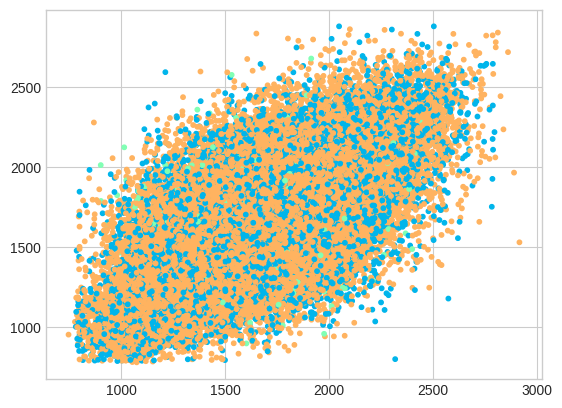

In [ ]:
plt.scatter(train_black_elo, train_white_elo, s=10, c=train_termination, cmap="rainbow")
plt.xlabel('Black Rating')
plt.ylabel('White Rating')

Now lets make a decision tree and visualize it. Given the complexity of the data, we may have a situation of overfitting.

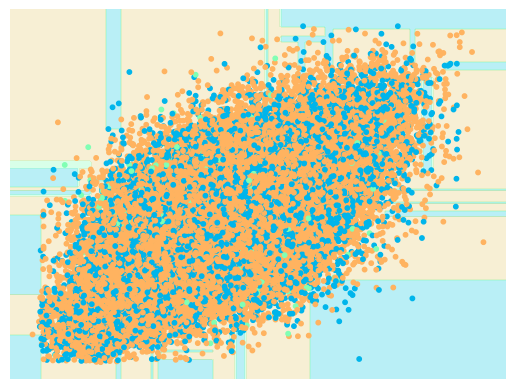

In [10]:
from sklearn.tree import DecisionTreeClassifier

def visualize_classifier(model, X, y, alpha=1, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap, clim=(min(y), max(y)), zorder=3, alpha=alpha)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(max_depth=10), np.column_stack((train_black_elo, train_white_elo)), train_termination)

As expected, the data seems to be overfit. Let's see how it looks without the points present.

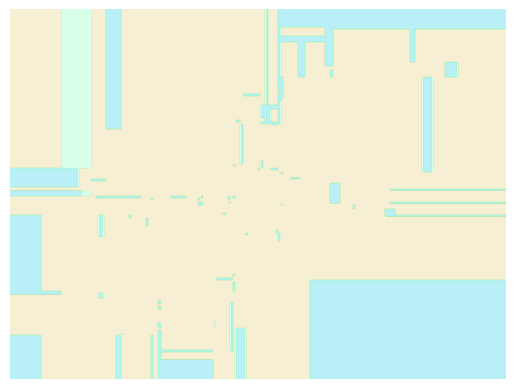

In [11]:
visualize_classifier(DecisionTreeClassifier(max_depth=10), np.column_stack((train_black_elo, train_white_elo)), train_termination, alpha=0)

This is a clear sign of overfitting. The classifier is reacting to the slightest of shifts in rating. It is worth the addition of extra features and a different visualization method. Let's add in those extra features.

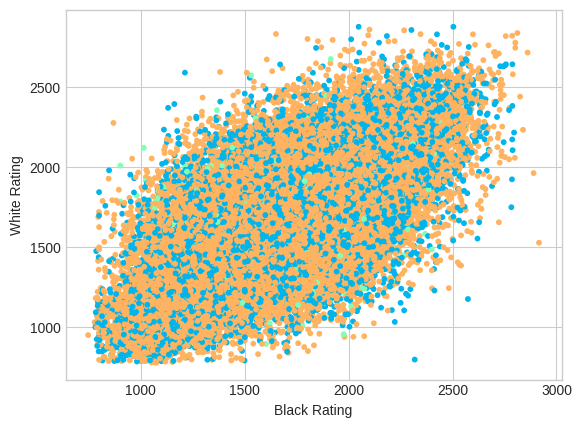

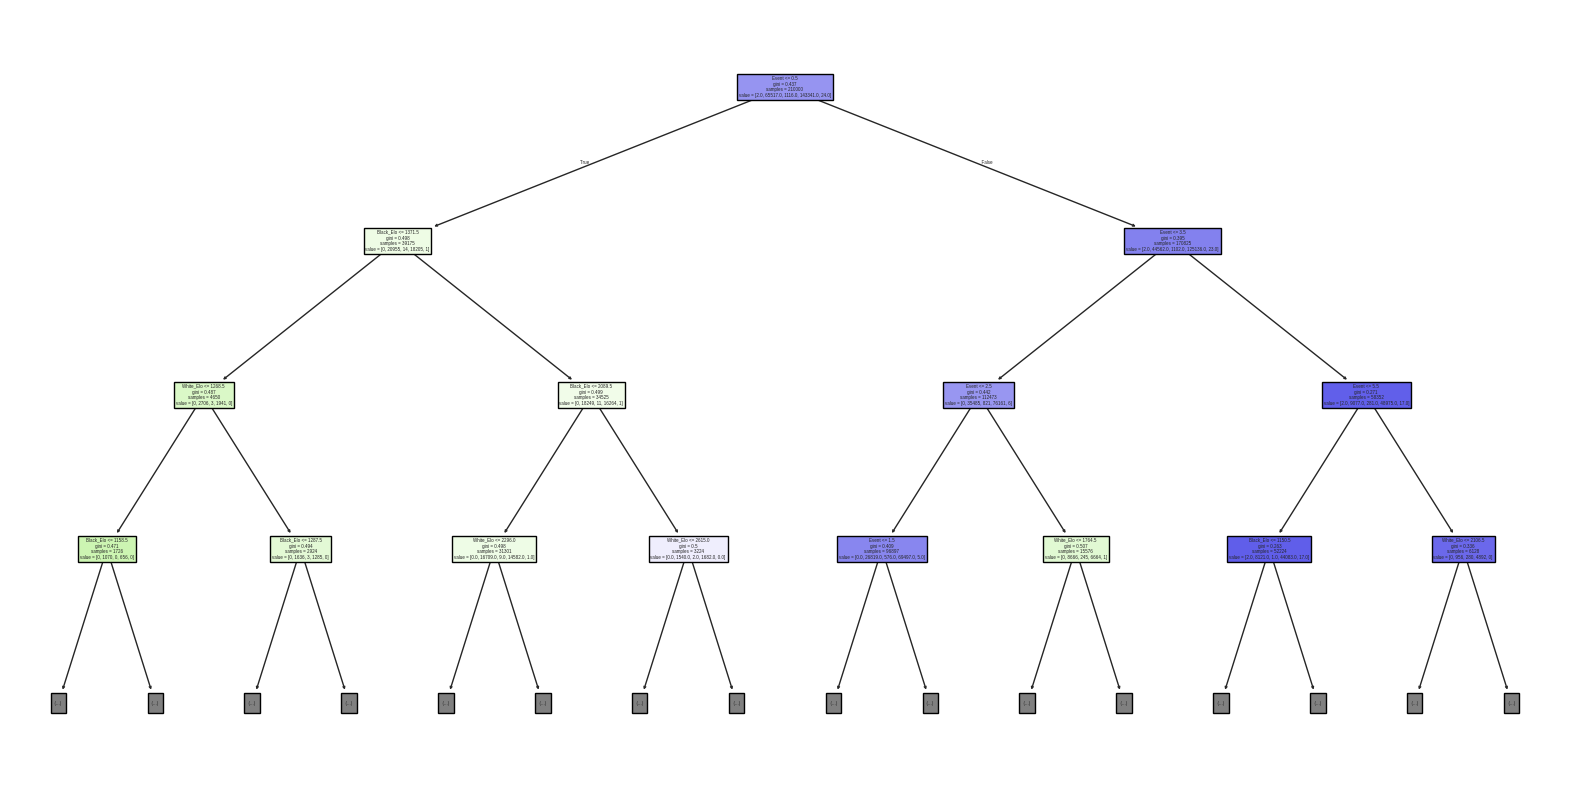

In [9]:
model = DecisionTreeClassifier()
model.fit(np.column_stack((train_black_elo, train_white_elo, train_events)), train_termination)
y=model.predict(np.column_stack((train_black_elo, train_white_elo, train_events)))
plt.scatter(train_black_elo, train_white_elo, c=y, s=10, cmap="rainbow")
plt.xlabel('Black Rating')
plt.ylabel('White Rating')
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, max_depth=3, feature_names=["Black_Elo", "White_Elo", "Event"])
plt.show()

# Conclusion
Even with the addition of extra features, the model is still experiencing overfitting. The ideal next step is to move on to Random Forests, in the hopes of reducing the effects of the overfitting.